# EXEMPLO - Aula_18 - Cross-validation

In [47]:
# carregando as librarys e sub-librarys
import pandas as pd #to load the data file as a Pandas data frame and analyze the data.
import numpy as np
from sklearn import datasets, linear_model #datasets-load a sample dataset linear_model-run a linear regression
from sklearn.model_selection import train_test_split #split to training and test sets
import matplotlib.pyplot as plt #plot graphs of the data
import patsy as ps
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



## Carrega base de dados Diabetes

Resumo: 442 pacientes com diabetes foram medidos para <br> 10 variáveis (idade, sexo, bmi (índice de massa corporal), map (pressão arterial média), seis medidas de soro sanguíneo)

In [48]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
Y = diabetes.target # define the target variable (dependent variable) as y

In [49]:
df1 = pd.DataFrame(df)
df1.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [50]:
#df['age'] = df['age'].apply(np.log)

In [51]:
# describe vars
#df.describe()

In [52]:
# arrumando a var sexo
#def arruma(age):
#    if age < 0:
#        return '0'
#    else:
#        return '1'
#df['sex'] = df['sex'].apply(arruma)

## Parte_1: Dividindo a Base em treinamento e teste

Podemos usar a função train_test_split para fazer a divisão. <br>
O test_size = 0.2 dentro da função indica a porcentagem dos dados que devem ser mantidos para testes. <br>
Geralmente é cerca de 80/20 ou 70/30.

In [53]:
# criando as bases de treinamento e teste
# fixando a semente para não alterar a amostra a cad vez que for rodar o programa
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=1234)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## Parte_2: Ajustando um modelo linear na base de treinamento

In [54]:
# Ajustando o modelo
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
# Obtendo as predições do modelo ajustado
p_train = lm.predict(X_train)
p_test = lm.predict(X_test)
#print(p_train[0:5])
#print(p_test[0:5])
model.coef_

array([  -43.45526217,  -280.55848553,   528.97893541,   346.50018232,
       -1032.32970269,   661.5777617 ,   241.08637357,   240.52992036,
         798.26318387,   123.16933708])



 ---Base de Train---


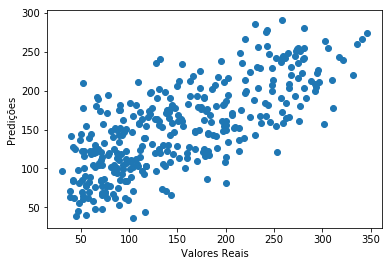



 ---Base de Test---


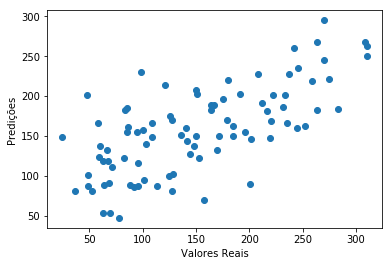

In [55]:
## Plotando o modelo ajustado
print ("\n\n ---Base de Train---")
plt.scatter(y_train, p_train) # real versus previsto train
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()
print ("\n\n ---Base de Test---")
plt.scatter(y_test, p_test) # real versus previsto test
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [56]:
# R^2 do modelo
print ("R^2 train:", model.score( X_train, y_train))
print ("R^2 test:", model.score( X_test, y_test))

R^2 train: 0.527130975259
R^2 test: 0.462633650798


Resumo: <br> 
1. Carga dos dados  <br> 
2. Divisão da base em treinamento e teste  <br> 
3. Ajuste de um modelo de regressão aos dados de treinamento  <br> 
4. Previsões com base nesses dados   <br> 
5. Teste das previsões nos dados do teste  <br> 

Parece bom, certo? <br> 
Mas a divisão em treinamento/teste tem seus perigos:  <br> 
E se a divisão não for aleatória?  <br> 
E se um subconjunto dos dados tiver apenas pessoas de um determinado estado ou funcionários com um certo nível de renda, mas não outros níveis de renda, apenas mulheres ou apenas pessoas com certa idade?  <br> 
Isso resultará em overfitting, mesmo que tentemos evitá-lo!  <br> 
É aqui que entra a validação cruzada.

## Parte_3: Métodos de Cross Validation

### 1. k-fold 

KFold divide as amostras em k grupos de amostras, chamadas dobras, de tamanhos iguais (se possível). <br>
A função de predição é aprendida usando k-1 dobras e a dobra que resta é usada para teste.

In [57]:
from sklearn.model_selection import KFold # import KFold

X1 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y1 = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2,random_state=1234) # Define the split - into 2 folds 
kf.get_n_splits(X1) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=2, random_state=1234, shuffle=False)


In [58]:
for train_index, test_index in kf.split(X1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]

#for i in kf.split(X):
#    print(i)
# mostra quais as linhas serão utilizadas para teste e quais serão utilizadas para treinamento

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


A função divide os dados originais em diferentes subconjuntos dos dados. <br> Um exemplo muito simples, mas acho que explica muito bem o conceito.

In [59]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [60]:
# Perform 6-fold cross validation'
scores1 = cross_val_score(model, df, Y, cv=6)
print ("Cross-validated 6-fold scores: ", scores1)
print("Average 6-Fold CV Score: {}".format(np.mean(scores1)))

Cross-validated 6-fold scores:  [ 0.4554861   0.46138572  0.40094084  0.55220736  0.43942775  0.56923406]
Average 6-Fold CV Score: 0.4797803047530258


Como você pode ver, a última dobra melhorou a pontuação do modelo original  de 0.463 para 0,569. <br>
Não é um resultado surpreendente, mas oi, vamos tomar o que podemos conseguir. <br>
Agora, vamos traçar as novas previsões, depois de realizar a validação cruzada:

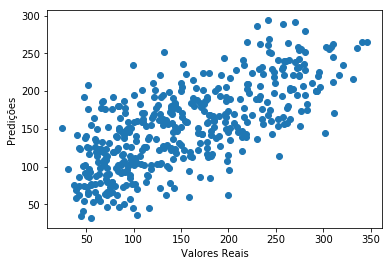

In [61]:
# Make cross validated predictions
predictions1 = cross_val_predict(model, df, Y, cv=6)
plt.scatter(Y, predictions1)
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

Este gráfico é muito diferente do original. Temos seis vezes mais pontos do que o gráfico original porque usei cv = 6. <br>
Finalmente, vamos verificar a classificação R² do modelo <br>
(R² é um "número que indica a proporção da variância na variável dependente que é previsível a partir da(s) variável(is) independente(s)". Basicamente, quão preciso é o nosso modelo):

In [62]:
accuracy1 = metrics.r2_score(Y, predictions1)
print ("Cross-Predicted 6-fold  R^2:", accuracy1)

Cross-Predicted 6-fold  R^2: 0.490806583864


### 2. Leave One Out Cross Validation (LOO) 

LeaveOneOut (ou LOO) é uma simples validação cruzada. <br> 
Cada conjunto de treinamento é criado tomando todas as amostras, exceto uma, o conjunto de teste usa esta amostra excluída. <br> 
Assim, para n amostras, temos n conjuntos de treinamento diferentes e n conjuntos de testes diferentes. <br> 
Este procedimento de validação cruzada não desperdiça muitos dados, pois apenas uma amostra é removida do conjunto de treinamento

In [63]:
from sklearn.model_selection import LeaveOneOut 
X2 = np.array([[1, 2], [3, 4]])
y2 = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X2,y2)


for train_index, test_index in loo.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index)
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    print(X2_train, X2_test, y2_train, y2_test)

#TRAIN: [1] TEST: [0] #linha 0 vai ser teste e linha 1 vai ser train
#[[3 4]] [[1 2]] [2] [1]
#X_train - [[3 4]]
#X_test  - [[1 2]] 
#y_train - [2] from sklearn.model_selection import LeaveOneOut 


TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [64]:
# Um exemplo com maior número de linhas na tabela
from sklearn.model_selection import LeaveOneOut 
X2 = np.array([[1, 2], [3, 4],[5, 6], [7, 8],[9, 0]])
y2 = np.array([10,11,12,13,14])
loo = LeaveOneOut()
### 2. Leave One Out Cross Validation (LOOCV) loo = LeaveOneOut()
loo.get_n_splits(X2)


for train_index, test_index in loo.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index)
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    print(X2_train, X2_test, y2_train, y2_test)

TRAIN: [1 2 3 4] TEST: [0]
[[3 4]
 [5 6]
 [7 8]
 [9 0]] [[1 2]] [11 12 13 14] [10]
TRAIN: [0 2 3 4] TEST: [1]
[[1 2]
 [5 6]
 [7 8]
 [9 0]] [[3 4]] [10 12 13 14] [11]
TRAIN: [0 1 3 4] TEST: [2]
[[1 2]
 [3 4]
 [7 8]
 [9 0]] [[5 6]] [10 11 13 14] [12]
TRAIN: [0 1 2 4] TEST: [3]
[[1 2]
 [3 4]
 [5 6]
 [9 0]] [[7 8]] [10 11 12 14] [13]
TRAIN: [0 1 2 3] TEST: [4]
[[1 2]
 [3 4]
 [5 6]
 [7 8]] [[9 0]] [10 11 12 13] [14]


Mais uma vez um exemplo bem simples mas realmente ajuda na compreensão do conceito básico desse método. <br>
Então, qual método devemos usar? <br>
Quantas dobras? <br>
- Quanto mais dobras tivermos, estaremos reduzindo o erro devido ao viés, mas aumentando o erro devido à variação; o preço computacional também aumentaria, obviamente - quanto mais dobras você tiver, mais tempo seria necessário para computá-lo e você precisaria de mais memória. <br>
- Com um menor número de dobras, estamos reduzindo o erro devido à variação, mas o erro devido ao viés é maior. É também computacionalmente mais barato. <br>
- Portanto, em conjuntos de dados grandes, geralmente é aconselhável que k = 3. Em conjuntos de dados menores, como mencionei anteriormente, é melhor usar o LOOCV.

In [65]:
# verificando número de obs na base de dados
df.shape
# 442

(442, 10)

In [66]:
# Perform n(442)-fold cross validation
scores2 = cross_val_score(model, df, Y, cv=200)
#print ("Cross-validated Leave One Out scores: ", scores2)


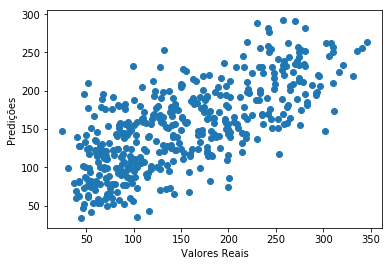

In [67]:
# Make cross validated predictions
predictions2 = cross_val_predict(model, df, Y, cv=200)
plt.scatter(Y, predictions2)
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [68]:
accuracy2 = metrics.r2_score(Y, predictions2)
print ("Cross-Predicted n-fold R^2:", accuracy2)

Cross-Predicted n-fold R^2: 0.493424990339


### 3. K-Fold estratificada

Stratified K-Fold é uma variação de dobra em K, que retorna dobras estratificadas, isto é, cria dobras ao preservar a mesma porcentagem para cada classe-alvo como no conjunto completo.

In [69]:
#Example of stratified 3-fold cross-validation on a dataset with 10 samples from two slightly unbalanced classes:
from sklearn.cross_validation import StratifiedKFold
X1 = [[0., 0.],
     [1., 1.],
     [-1., -1.],
     [2., 2.],
     [3., 3.],
     [4., 4.],
     [0., 1.],
     [3., 3.],
     [4., 4.],
     [0., 1.]]
Y1 = [0, 0, 0, 1, 1, 1, 0,1,1,0]

skf = StratifiedKFold(Y1, 3)
print(skf)

for train, test in skf:
        print(train, test)

sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 1 1 1 0 1 1 0], n_folds=3, shuffle=False, random_state=None)
[2 5 6 7 8 9] [0 1 3 4]
[0 1 3 4 8 9] [2 5 6 7]
[0 1 2 3 4 5 6 7] [8 9]


### 4. Leave P Out (LPO) 

LeavePOut é muito semelhante ao LeaveOneOut, pois cria todos os conjuntos de treinamento/teste possíveis, removendo p amostras do conjunto completo para o teste.<br>
Ao contrário de LeaveOneOut e KFold, os conjuntos de teste se sobrepõem para p> 1.<br>
número de subconjuntos n!/(p!(n-p)!)


In [70]:
#Example of Leave-2-Out on a dataset with 4 samples:
from sklearn.model_selection import LeavePOut

X1 = np.ones(5)
lpo = LeavePOut(p=2)

#print(X, lpo)
# número de subconjuntos n!/(p!(n-p)!)

In [71]:
for train, test in lpo.split(X1):
    print("%s %s" % (train, test))

[2 3 4] [0 1]
[1 3 4] [0 2]
[1 2 4] [0 3]
[1 2 3] [0 4]
[0 3 4] [1 2]
[0 2 4] [1 3]
[0 2 3] [1 4]
[0 1 4] [2 3]
[0 1 3] [2 4]
[0 1 2] [3 4]


### 5. Leave One Label Out (LOLO) 

LeaveOneLabelOut (LOLO) é um esquema de validação cruzada que contém as amostras de acordo com um rótulo fornecido. Esta informação do rótulo pode ser usada para codificar as estratificações específicas. <br>
Cada conjunto de treinamento é assim constituído por todas as amostras, exceto as relacionadas a um rótulo específico        

In [72]:
from sklearn.cross_validation import LeaveOneLabelOut
X1 = [[0., 0.], [1., 1.], [-1., -1.], [2., 2.], [1., 1.], [-1., -1.], [2., 2.]]
Y1 = [0, 1, 0, 1, 1, 1, 0]
labels = [1, 1, 2, 2, 3, 3, 3]

lolo = LeaveOneLabelOut(labels)
print(lolo)

for train, test in lolo:
    print(train, test)

sklearn.cross_validation.LeaveOneLabelOut(labels=[1 1 2 2 3 3 3])
[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3] [4 5 6]


### 6. Leave P Label Out (LPLO) 

Leave-P-Label-Out é semelhante ao Leave-One-Label-Out, mas remove amostras relacionadas aos P rótulos para cada conjunto de treinamento/teste.

In [73]:
from sklearn.cross_validation import LeavePLabelOut
X1 = [[0., 0.], [1., 1.], [-1., -1.], [2., 2.], [3., 3.], [4., 4.]]
Y1 = [0, 1, 0, 1, 0, 1]
labels = [1, 1, 2, 2, 3, 3]
lplo = LeavePLabelOut(labels, 2)
print(lplo)

for train, test in lplo:
    print(train, test)

sklearn.cross_validation.LeavePLabelOut(labels=[1 1 2 2 3 3], p=2)
[4 5] [0 1 2 3]
[2 3] [0 1 4 5]
[0 1] [2 3 4 5]


### 7. ShuffleSplit

O iterador ShuffleSplit gerará um número definido pelo usuário de divisões independentes do conjunto de dados de train/teste. <br>
As amostras são primeiro embaralhadas e, em seguida, divididas em dois conjuntos de train e teste. <br>
É possível controlar a aleatoriedade para a reprodutibilidade dos resultados, criando explicitamente o gerador de números pseudo aleatórios random_state.

O ShuffleSplit é uma boa alternativa para a validação cruzada K-Fold pois permite um controle mais preciso sobre o número de iterações e a proporção de amostras em cada lado da divisão do train/teste.

In [74]:
from sklearn.model_selection import ShuffleSplit
X1 = np.arange(5)
ss = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X1):
    print("%s %s" % (train_index, test_index))

[1 3 4] [2 0]
[1 4 3] [0 2]
[4 0 2] [1 3]


## Parte_4: Curva de aprendizado

In [75]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


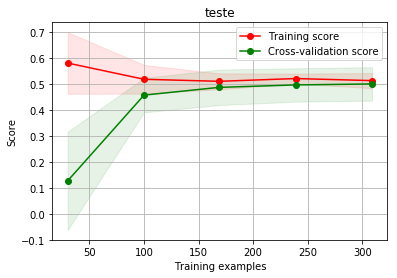

In [76]:

# plotando a curva de aprendizado usando o metodo de validação cruzada ShuffleSplit
ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
lm = linear_model.LinearRegression()
plot_learning_curve(lm, 'teste', df1, Y, cv=ss, n_jobs=4)
plt.show()

Referências <br>
- https://medium.com/towards-data-science/train-test-split-and-cross-validation-in-python-80b61beca4b6

- http://scikit-learn.org/stable/modules/cross_validation.html

- http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/cross_validation.html
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html